# 数据分析（进阶）项目二 data warangle
# 一、数据整理
## 1.1 数据收集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json
%matplotlib inline

image-predictions.tsv，预测档案，  
tweet_json.txt，额外附加数据，转发数，喜欢数等  
twitter-archive-enhanced.csv，推特档案

In [2]:
df_image = pd.read_csv("image-predictions.tsv",sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
with open('tweet_json1.txt',encoding='utf-8') as file:  
    data =[]
    for line in file:
        a = json.loads(line)
        #print(line["retweet_count"],line.favorite_count)
        data_line = [a['id'],a['retweet_count'],a['favorite_count']]
        data.append(data_line)
    df_json = pd.DataFrame(data,columns=['id','retweet_count','favorite_count'])
    df_json.index=df_json.id
    df_json = df_json.drop(['id'],axis=1)

In [5]:
df_json.head()

,retweet_count,favorite_count
id,,
892420643555336193,8842,39492
892177421306343426,6480,33786
891815181378084864,4301,25445
891689557279858688,8925,42863
891327558926688256,9721,41016


## 1.2 数据评估
### 1.2.1 目测评估

In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#1 df_archive.timestamp时间戳为str格式
type(df_archive.timestamp[0])

str

1. tweet_id格式为int
2. timestamp格式为str
3. 存在181个转发的记录

### 2.2.2 编程评估

In [8]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [10]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#2  
“地位”几列（doggo,floofer,pupper,puppo）空缺数据以None填充

In [12]:
df_archive['expanded_urls'].value_counts()[:5]

https://twitter.com/dog_rates/status/667182792070062081/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/700143752053182464/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1    2
https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                                                          

In [13]:
df_archive[df_archive['expanded_urls']=='https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


#4  
expanded_urls存在数据重复

In [14]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


rating_numerator大部分均略大于等于10，但存在异常值（最小为0分，最大1776分）  
rating_denominator大部分等于10，但存在异常值（最小为0分，最大170分）  

In [15]:
df_archive.name.value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Name: name, dtype: int64

#5  
name列存在数据缺失，填写为None或a的记录

In [16]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

异常值较多，仅查看三个：

In [18]:
df_archive[df_archive.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [19]:
df_archive[df_archive.rating_numerator == 960]['text'].values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"],
      dtype=object)

In [20]:
df_archive[df_archive.index==313][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0


#6  
评分的分子/分母分别为960/00

In [21]:
df_archive[df_archive.rating_denominator ==11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [22]:
df_archive[df_archive.index==1068][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
1068,9,11


In [23]:
df_archive[df_archive.index == 1068]['text'].values

array(['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'],
      dtype=object)

#7   
index==1068text中分值为9/11

In [24]:
df_archive[df_archive.index==1662][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
1662,7,11


In [25]:
df_archive[df_archive.index==1662]['text'].values

array(['This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'],
      dtype=object)

#8  
index==1662，text中分值为7/11

index=657和index=2212的expanded_url重复,两条为重复记录

In [26]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#9 部分图片不是狗狗照片

In [27]:
df_archive.source.head()[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#11  
df_archive.source列的内容为json格式文本，包含href，rel和'内容'三部分

In [28]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_json.describe()

,retweet_count,favorite_count
count,2352.000000,2352.000000
mean,3134.932398,8109.198980
std,5237.846296,11980.795669
min,0.000000,0.000000
25%,618.000000,1417.000000
50%,1456.500000,3596.500000
75%,3628.750000,10118.000000
max,79116.000000,132318.000000


#10  
df_image共有2075条记录，df_archive和df均有2352记录。 
#12  
df_archive和评论点赞数的df在两个表中。  
#13  
“地位”（doggo,floofer,pupper,puppo）在不同列中。

### 1.2.3 评估结果
**质量问题**

- **df_archive**

 1. timestamp格式为str
 2. “地位”几列（doggo,floofer,pupper,puppo）空缺数据以None填充
 3. 存在181个转发的记录
 4. expanded_urls存在数据重复
 5. name列存在数据缺失，填写为None或a的记录
 6. index=313，rating_numerator、rating_denominator分别为960，0
 7. index=1068，rating_numerator、rating_denominator分别为9,11
 8. index=1662，rating_numerator、rating_denominator分别为7,11

- **df_image**

 9. 部分图片第一个识别项目预测不是狗狗照片
 10. df_image共有2075条记录，df_archive和df均有2352记录。

**结构问题**

11. df_archive.source列的内容为json格式文本，包含href，rel和'内容'三部分
12. df_archive和评论点赞数的df在两个表中
13. “地位”（doggo,floofer,pupper,puppo）在不同列中

## 1.3 **清洗**

**质量问题**

**df_archive**
1. timestamp格式为时timestamp
2. “地位”几列（doggo,floofer,pupper,puppo）标记为None的内容以空值填充
3. 删除181个转发的记录
4. 删除expanded_urls重复项中的时间较早的记录
5. name列标记为None或a的内容以空值填充
6. index=313，rating_numerator、rating_denominator分别为13，10
7. index=1068，rating_numerator、rating_denominator分别修改为14,10
8. index=1662，rating_numerator、rating_denominator分别修改为10，10

**df_image**
9. 删除第一个识别项目预测结果为非狗狗的记录
10. 只保留df_archive和df中和df_image匹配的记录。

**结构问题**
11. df_archive.source列拆分为href，rel和'内容'三部分
12. 合并df_archive,df_image和df表
13. “地位”（doggo,floofer,pupper,puppo）内容合并到一列中

In [30]:
#11
href = []
rel = []
source_text = []
for i in range(df_archive.shape[0]):
    href.append(df_archive.source[i][9:].split('" rel="')[0])
    rel.append(df_archive.source[i][9:].split('" rel="')[1].split('">')[0])
    source_text.append(df_archive.source[i].split('href="')[1].split('" rel="')[1].split('">')[1][:-4])
df_archive['href'] =href
df_archive['rel'] = rel
df_archive['source_text'] = source_text
df_archive = df_archive.drop(columns='source')

In [31]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'href', 'rel', 'source_text'],
      dtype='object')

In [32]:
#1
df_archive.timestamp = pd.to_datetime(df_archive.timestamp)
type(df_archive.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
#2  
df_archive[['doggo','floofer','pupper','puppo']] = df_archive[['doggo','floofer','pupper','puppo']].replace(['None'],'')

In [34]:
df_archive['degree'] = df_archive['doggo']+df_archive['floofer']+df_archive['pupper']+df_archive['puppo']

In [35]:
df_archive.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [36]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'href', 'rel', 'source_text', 'degree'],
      dtype='object')

In [37]:
#3
df_archive = df_archive[df_archive.retweeted_status_id.isnull()]

In [38]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'href', 'rel', 'source_text', 'degree'],
      dtype='object')

In [39]:
df_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [40]:
#4
df_archive.drop(index=2212,inplace=True)

In [41]:
df_archive[df_archive['expanded_urls']=='https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,href,rel,source_text,degree
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,http://vine.co,nofollow,Vine - Make a Scene,


In [42]:
#5
df_archive.name = df_archive.name.replace(['None','a'],'')

In [43]:
df_archive.name.value_counts().head()

           735
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Name: name, dtype: int64

In [44]:
#6
df_archive.loc[313,['text']].values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"],
      dtype=object)

In [45]:
df_archive.loc[313,['rating_numerator','rating_denominator']]

rating_numerator      960
rating_denominator      0
Name: 313, dtype: object

In [46]:

df_archive.loc[313,['rating_numerator','rating_denominator']]=[13,10]

In [47]:
#7  
df_archive[df_archive.index==1068][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
1068,9,11


In [48]:
df_archive.loc[1068,'rating_numerator']=14

In [49]:
df_archive.loc[1068,'rating_denominator']=10

In [50]:
#8 
df_archive[df_archive.index==1662][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
1662,7,11


In [51]:
df_archive.loc[1662,['rating_numerator','rating_denominator']]=[10,10]

In [52]:
df_archive[df_archive.index==1662][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
1662,10,10


In [53]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [65]:
#删除第一个识别项目预测结果为非狗狗的记录
df_image.drop(index = df_image[df_image['p1_dog']==False].index,inplace=True)
df_image.drop(columns='p1_dog',inplace=True)
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


In [66]:
#9 只保留第一个识别项目
df_image = df_image.iloc[:,:6]
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [67]:
df_image.shape

(1532, 5)

In [56]:
df_json.head()

,retweet_count,favorite_count
id,,
892420643555336193,8842,39492
892177421306343426,6480,33786
891815181378084864,4301,25445
891689557279858688,8925,42863
891327558926688256,9721,41016


In [68]:
df = df_archive.set_index('tweet_id').join(df_image.set_index('tweet_id'),how='inner').join(df_json)
df.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,href,rel,source_text,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445


# 二、数据储存

In [69]:
df.to_csv('twitter_archive_master.csv')

# 三、分析和可视化

In [70]:
df.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'href', 'rel', 'source_text', 'degree', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'retweet_count', 'favorite_count'],
      dtype='object')

In [165]:
df.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,href,rel,source_text,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 892177421306343426 to 666020888022790149
Data columns (total 18 columns):
in_reply_to_status_id    14 non-null float64
in_reply_to_user_id      14 non-null float64
timestamp                1477 non-null datetime64[ns]
text                     1477 non-null object
expanded_urls            1477 non-null object
rating_numerator         1477 non-null int64
rating_denominator       1477 non-null int64
name                     1477 non-null object
href                     1477 non-null object
rel                      1477 non-null object
source_text              1477 non-null object
degree                   1477 non-null object
jpg_url                  1477 non-null object
img_num                  1477 non-null int64
p1                       1477 non-null object
p1_conf                  1477 non-null float64
retweet_count            1477 non-null int64
favorite_count           1477 non-null int64
dtypes: datetime64[ns](1), float

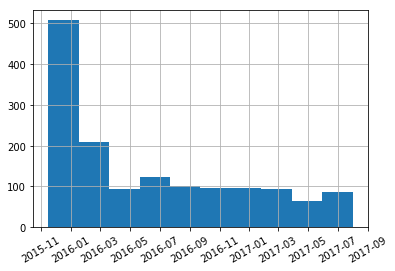

<Figure size 432x288 with 0 Axes>

In [321]:
df.timestamp.hist(xrot=30)
plt.show()
plt.savefig("date_distributing.png")

整理后数据共计1994条记录，时间范围为2015年11月-2017年0月，其中主要集中在2015年11，12月。

In [75]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,1.400000e+01,1.400000e+01,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,6.950829e+17,4.196984e+09,11.568720,10.534191,1.213947,0.614364,2787.014218,9295.416385
std,4.947686e+16,0.000000e+00,7.886486,6.849699,0.575230,0.260342,4774.261272,12714.186962
min,6.671522e+17,4.196984e+09,1.000000,2.000000,1.000000,0.044333,15.000000,81.000000
25%,6.724958e+17,4.196984e+09,10.000000,10.000000,1.000000,0.392108,655.000000,2224.000000
50%,6.755284e+17,4.196984e+09,11.000000,10.000000,1.000000,0.615741,1437.000000,4487.000000
75%,6.901517e+17,4.196984e+09,12.000000,10.000000,1.000000,0.853170,3240.000000,11692.000000
max,8.558181e+17,4.196984e+09,165.000000,150.000000,4.000000,0.999956,79116.000000,132318.000000


评分的分母（rating_denominator）主要为10，平均分为10.53，评分的分子（rating_numerator）略大于10，平均分为11.57，可见作者总体对狗狗评分较高；  
大部分记录中只有一张照片，最高有4张照片；  
平均转发数为2787，点赞数为9295；  

In [164]:
df.name.value_counts()[:6]

           406
Charlie     10
Cooper      10
Oliver       9
Tucker       8
Lucy         8
Name: name, dtype: int64

数量排名前五位的狗狗名字分别是：'Charlie', 'Cooper', 'Oliver', 'Tucker', 'Lucy'。

In [293]:
se_count_10 = df.p1.value_counts()[:10]

In [294]:
se_count = se_count_10.append(pd.Series(len(df.p1)-se_count_10.sum(), index=['others']))

In [329]:
se_count.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute',
       'others'],
      dtype='object')

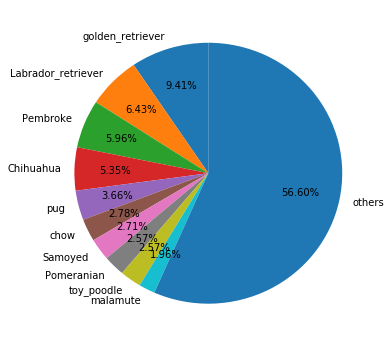

<Figure size 432x288 with 0 Axes>

In [345]:
plt.figure(figsize=(6,6))
plt.pie(se_count,labels=se_count.index,startangle=90,radius=1,autopct='%3.2f%%',pctdistance = 0.7)
plt.show()
plt.savefig("se_count.png")

In [319]:
print("在所有的{}条记录中，狗狗品种共有{}".format(len(df.p1),len(df.p1.value_counts())),"种；\n其中排名前10位的狗狗品种",list(se_count_10.index),"的数量占狗狗总数量的{}%".format(round(se_count_10.sum()/len(df.p1)*100)))

在所有的1477条记录中，狗狗品种共有111 种；
其中排名前10位的狗狗品种 ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute'] 的数量占狗狗总数量的43.0%


In [171]:
df_p1_10 = pd.DataFrame(df.p1.value_counts()[:10])

In [229]:
df_rating = df.groupby('p1').mean().loc[:,['rating_numerator','rating_denominator']]

In [233]:
df_rating.sort_values(by='rating_numerator',ascending=False)[:10]

,rating_numerator,rating_denominator
p1,,
clumber,27.000000,10.000000
soft-coated_wheaten_terrier,25.454545,25.454545
West_Highland_white_terrier,15.642857,14.285714
Great_Pyrenees,14.928571,12.857143
borzoi,14.444444,14.444444
Labrador_retriever,13.905263,12.526316
Siberian_husky,13.250000,12.000000
golden_retriever,13.244604,11.417266
Pomeranian,12.868421,10.000000


In [234]:
df_rating.sort_values(by='rating_numerator',ascending=False)[:10].index

Index(['clumber', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier',
       'Great_Pyrenees', 'borzoi', 'Labrador_retriever', 'Siberian_husky',
       'golden_retriever', 'Pomeranian', 'Saluki'],
      dtype='object', name='p1')

评分最高的前10位的狗狗品种分别是：'clumber', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier','Great_Pyrenees', 'borzoi', 'Labrador_retriever', 'Siberian_husky','golden_retriever', 'Pomeranian', 'Saluki'

In [245]:
df_rating['ratio'] = pd.DataFrame(round(df['rating_numerator']/df['rating_denominator'],2))

In [261]:
df['ratio'] = pd.DataFrame(round(df['rating_numerator']/df['rating_denominator'],2))

In [256]:
df_ratio = pd.DataFrame(df.apply(lambda x:x['rating_numerator']/x['rating_denominator'],axis=1))

In [271]:
df_rating['ratio'] = df.groupby('p1').mean().loc[:,'ratio']

In [276]:
df_rating.sort_values(by='ratio',ascending=False)[:10].join(df.p1.value_counts())

,rating_numerator,rating_denominator,ratio,p1
p1,,,,
clumber,27.000000,10.0,2.700000,1
Pomeranian,12.868421,10.0,1.286842,38
Saluki,12.500000,10.0,1.250000,4
briard,12.333333,10.0,1.233333,3
Tibetan_mastiff,12.250000,10.0,1.225000,4
Border_terrier,12.142857,10.0,1.214286,7
kuvasz,12.062500,10.0,1.206250,16
giant_schnauzer,12.000000,10.0,1.200000,3
standard_schnauzer,12.000000,10.0,1.200000,1


作者评分最高的一只狗狗品种是clunber，其次评分最高的一个狗狗品种是Pomeranian。

In [346]:
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,href,rel,source_text,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count,ratio
tweet_id,,,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786,1.3
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445,1.2
891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9721,41016,1.2
891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,3240,20548,1.3
890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,http://twitter.com/download/iphone,nofollow,Twitter for iPhone,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,2142,12053,1.3


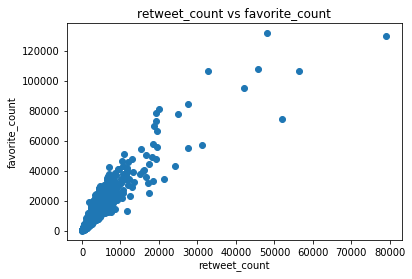

<Figure size 432x288 with 0 Axes>

In [372]:
plt.scatter(df.retweet_count,df.favorite_count)
plt.title("retweet_count vs favorite_count")
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")
plt.show()
plt.savefig("retweet_coun_favorite_count.png")

retweet_count和favorite_count呈现正相关性

In [360]:
df_retweet_rating = pd.DataFrame(df.groupby('p1').mean()['retweet_count']).join(pd.DataFrame(df.groupby('p1').mean()['rating_numerator']))

In [361]:
df_retweet_rating.head()

,retweet_count,rating_numerator
p1,,
Afghan_hound,5946.000000,9.666667
Airedale,1387.000000,9.833333
American_Staffordshire_terrier,2193.461538,11.000000
Appenzeller,1449.000000,11.000000
Australian_terrier,3058.500000,11.500000


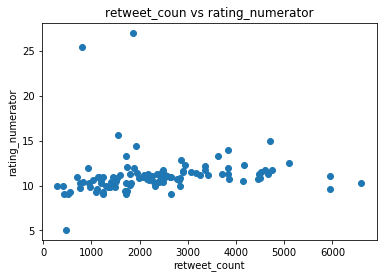

<Figure size 432x288 with 0 Axes>

In [374]:
plt.scatter(df_retweet_rating.retweet_count,df_retweet_rating.rating_numerator)
plt.title("retweet_coun vs rating_numerator")
plt.xlabel("retweet_count")
plt.ylabel("rating_numerator")
plt.show()
plt.savefig("retweet_coun_rating_numerator.png")

转发数和评分的相关性不大